<h1 style="color:blue;text-align:center;">Lab4 - Part 3</h1>

<hr style="border:2px solid blue;">

<h3 style="color:blue;">Realised by: <strong style="color:black;">Ouahid Mariyam</strong></h3>


<h3 style="color:blue;">Guided by: <strong style="color:black;">Pr . ELAACHAk LOTFI</strong></h3>
   

<p><strong>Objective :</strong> The main purpose behind this lab is to get familiar with NLP language models
using Pytorch library.</p>


In [28]:
import re
import nltk
import string
import os
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.corpus import stopwords
from collections import Counter

In [29]:
# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Load the data from a JSON file
data = "/content/drive/My Drive/Colab Notebooks/AMAZON_FASHION_5.json"
df = pd.read_json(data, lines=True)

In [31]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 3176
Number of columns: 12


In [32]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


In [33]:
# Calculate and display the distribution of ratings
rating_counts = df['overall'].value_counts()
percent = rating_counts / num_rows
rating_distribution = pd.DataFrame({'Rating Counts': rating_counts, 'Percentage of Total': round(percent, 2)})
print(rating_distribution)

         Rating Counts  Percentage of Total
overall                                    
5                 2158                 0.68
4                  471                 0.15
3                  337                 0.11
1                  117                 0.04
2                   93                 0.03


In [34]:
# Calculate and display the average rating
average_rating = df['overall'].mean()
print("Overall Average:", round(average_rating, 2))

Overall Average: 4.4


In [35]:
# Calculate word counts for each review and add it to the DataFrame
word_counts = df['reviewText'].apply(lambda x: len(str(x).split()))
df['word_counts'] = word_counts

# Summarize and display the word counts
word_counts_summary = df['word_counts'].value_counts().reset_index()
word_counts_summary.columns = ['Word Count', 'Number of Cells']
print(word_counts_summary.tail(10))

    Word Count  Number of Cells
78          81                8
79          59                8
80          74                8
81         123                6
82          46                6
83          75                6
84          86                2
85         181                1
86          80                1
87          93                1


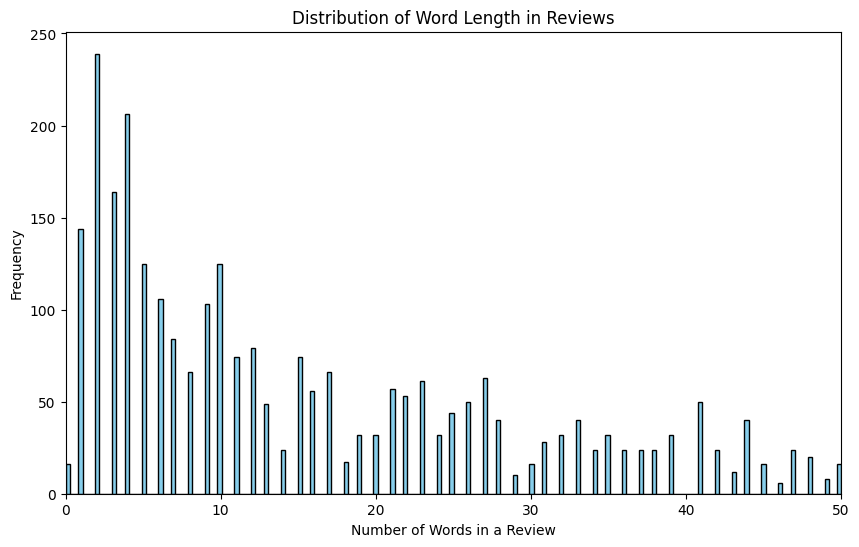

In [36]:
# Handle NaN values in 'reviewText'
df['reviewText'] = df['reviewText'].fillna('')

# Calculate word length
df['word_length'] = df['reviewText'].apply(lambda x: len(x.split()))

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['word_length'], bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words in a Review')
plt.ylabel('Frequency')
plt.title('Distribution of Word Length in Reviews')
plt.xlim(0, 50)  # Adjusting xlim to fit the sample data
plt.show()

In [37]:
# Concatenate all the text from the reviews into one string
text = ' '.join(df['reviewText'])

# Tokenize the text into words and convert to lowercase
words = re.findall(r'\w+', text.lower())

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Filter out the stop words
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_count = Counter(filtered_words)

# Get the 20 most common words and their frequencies
most_common_words = word_count.most_common(20)

# Display the most common words
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

shoes: 1344
comfortable: 1043
fit: 852
shoe: 806
love: 783
great: 650
size: 644
feet: 459
light: 440
like: 426
good: 381
wear: 362
pair: 339
perfect: 335
support: 316
nike: 303
really: 265
weight: 258
nice: 251
would: 238


In [38]:
# Function to remove punctuation from a text
def remove_punctuation(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        text_without_punctuation = text.translate(translator)
        return text_without_punctuation
    else:
        return str(text)

# Function to remove stopwords from a text
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''
print("Done!")

Done!


In [39]:
# Apply the text preprocessing functions to the reviews
df['reviewText'] = df['reviewText'].apply(remove_punctuation)
df['reviewText'] = df['reviewText'].apply(remove_stopwords)
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())
df['reviewText'].head()

0    great product price
1    great product price
2    great product price
3    great product price
4    great product price
Name: reviewText, dtype: object

In [40]:
# Calculate the word count for each preprocessed review and filter the DataFrame
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))
filtered_df = df[df['word_count'] <= 15]
filtered_df = filtered_df.drop(columns=['word_count'])
filtered_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,word_counts,word_length
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,great product price,Five Stars,1441324800,NaN,NaN,4,4
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,great product price,Five Stars,1441324800,NaN,NaN,4,4
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,great product price,Five Stars,1441324800,NaN,NaN,4,4
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,great product price,Five Stars,1441324800,NaN,NaN,4,4
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,great product price,Five Stars,1441324800,NaN,NaN,4,4


In [41]:
# Display the number of rows in the filtered DataFrame
rows = filtered_df.shape[0]
print(rows)

2333


In [42]:
# Import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Adjust the number of features as needed
    stop_words='english',
    lowercase=True,
    strip_accents='unicode',  # Remove accents during preprocessing
    token_pattern=r'\b[a-zA-Z]{3,}\b'  # Consider words with at least 3 characters
)

# Fit and transform the review texts to a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['reviewText'])
tfidf_array = tfidf_matrix.toarray()
vocabulary = tfidf_vectorizer.vocabulary_
tfidf_df = pd.DataFrame(tfidf_array, columns=vocabulary.keys())

print("Done")

Done


In [43]:
# Define bins and labels for categorizing ratings
bins = [0, 2, 3, 5]
labels = ['Negative', 'Neutral', 'Positive']

In [44]:
# Create a new column 'rating_category' based on the overall rating
df['rating_category'] = pd.cut(filtered_df['overall'], bins=bins, labels=labels, include_lowest=True)
df2 = df.dropna(subset=['rating_category'])

In [45]:
# Display the first 10 rating categories
df2['rating_category'].head(10)

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
5     Neutral
6    Positive
7    Positive
8    Positive
9     Neutral
Name: rating_category, dtype: category
Categories (3, object): ['Negative' < 'Neutral' < 'Positive']

In [46]:
# Import necessary modules from sklearn for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = tfidf_df
y = df2['rating_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and display the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.987152034261242


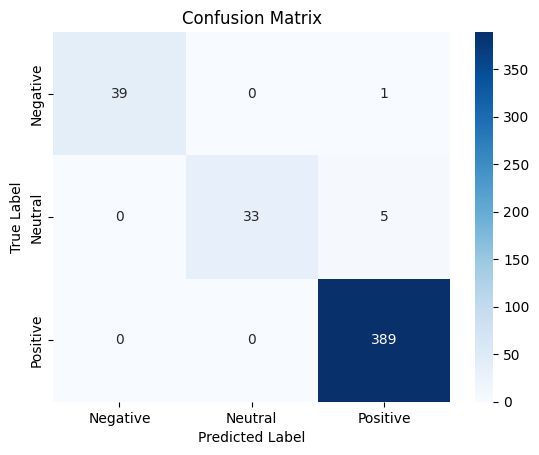

In [47]:
# Import necessary modules for plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and display the confusion matrix
class_labels = ['Negative', 'Neutral', 'Positive']
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()